In [260]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
cividis = mpl.colormaps.get_cmap('cividis')

# colors = viridis(np.linspace(0, 1, 5))
vcolors = viridis(np.linspace(0, 1, 5))
ccolors = cividis(np.linspace(0, 1, 5))


colormap = {
    "DSched S(1)": ccolors[0],
    "DSched S(2)": ccolors[1],
    "DSched S(4)": ccolors[2],
    "DSched D(1-8)": vcolors[3],
    "DSched S(8)": ccolors[3],
    
}

In [237]:
time_limit_goodput = {
    "DSched S(1)": {
        60: [933, 942],
        50: [901, 944],
        40: [928, 923],
        30: [908, 924],
        20: [896, 891],
        10: [885, 890]
    },
    "DSched S(2)": {
        60: [948, 956],
        50: [947, 951],
        40: [950, 957],
        30: [946, 943],
        20: [946, 955],
        10: [943, 949]
    },
    "DSched S(4)": {
        60: [934, 943],
        50: [934, 936],
        40: [934, 936],
        30: [935, 932],
        20: [939, 949],
        10: [938, 950]
    },
    "DSched S(8)": {
        60: [898, 907],
        50: [895, 905],
        40: [887, 915],
        30: [887, 900],
        20: [876, 905],
        10: [895, 909]
    },
    "DSched D(1-8)": {
        60: [957, 960],
        50: [944, 963],
        40: [948, 962],
        30: [951, 959],
        20: [951, 963],
        10: [945, 955]
    },
    # "DSched Dynamic(1-8) + Sel": {
    #     60: [895, 916],
    #     50: [901, 914],
    #     40: [896, 919],
    #     30: [903, 921],
    #     20: [903, 915],
    #     10: [893, 923]
    # },
}


In [232]:
def getDataPoint(np_array):
    return DataPoint(
        min=np.min(np_array),
        mean=np.mean(np_array),
        median=np.median(np_array),
        max=np.max(np_array),
        sd=np.std(np_array, ddof=1))

In [238]:
time_limit_sweep_miss_rate = {}
time_limit_attainment_datapoints = {}

for scheduler, datapoints in time_limit_goodput.items():
    time_limit_sweep_miss_rate[scheduler] = {}
    time_limit_attainment_datapoints[scheduler] = {}
    for slo, slo_datapoints in datapoints.items():
        slo_miss_rate_datapoints = 100 - (np.array(slo_datapoints) / 10)
        slot_attainment_datapoints = (np.array(slo_datapoints) / 10)
        time_limit_sweep_miss_rate[scheduler][slo] = getDataPoint(slo_miss_rate_datapoints)
        time_limit_attainment_datapoints[scheduler][slo] = getDataPoint(slot_attainment_datapoints)

In [239]:
time_limit_attainment_datapoints

{'DSched S(1)': {60: DataPoint(min=93.3, mean=93.75, median=93.75, max=94.2, sd=0.6363961030678968),
  50: DataPoint(min=90.1, mean=92.25, median=92.25, max=94.4, sd=3.0405591591021626),
  40: DataPoint(min=92.3, mean=92.55, median=92.55, max=92.8, sd=0.3535533905932738),
  30: DataPoint(min=90.8, mean=91.6, median=91.6, max=92.4, sd=1.131370849898482),
  20: DataPoint(min=89.1, mean=89.35, median=89.35, max=89.6, sd=0.3535533905932738),
  10: DataPoint(min=88.5, mean=88.75, median=88.75, max=89.0, sd=0.3535533905932738)},
 'DSched S(2)': {60: DataPoint(min=94.8, mean=95.19999999999999, median=95.19999999999999, max=95.6, sd=0.565685424949236),
  50: DataPoint(min=94.7, mean=94.9, median=94.9, max=95.1, sd=0.282842712474613),
  40: DataPoint(min=95.0, mean=95.35, median=95.35, max=95.7, sd=0.4949747468305853),
  30: DataPoint(min=94.3, mean=94.44999999999999, median=94.44999999999999, max=94.6, sd=0.21213203435596226),
  20: DataPoint(min=94.6, mean=95.05, median=95.05, max=95.5, sd=0.

In [197]:
def plot(datapoint_collection):
    random_key = list(time_limit_goodput.keys())[0]
    x_axis_points = list(sorted(datapoint_collection[random_key].keys()))
    x_axis_points_labels = [x for x in x_axis_points]
    for i, scheduler in enumerate(time_limit_goodput.keys()):
        plt.errorbar(x_axis_points_labels, 
                     [datapoint_collection[scheduler][x].mean for x in x_axis_points], 
                     yerr=[datapoint_collection[scheduler][x].sd  for x in x_axis_points], 
                     marker='.', 
                     label=scheduler, color=colormap[scheduler], capsize=4)
    # plt.errorbar(x_axis_points_labels, 
    #              [datapoint_collection["EDF"][x].mean for x in x_axis_points], 
    #              yerr=[datapoint_collection["EDF"][x].sd  for x in x_axis_points], 
    #              marker='o', label="EDF", color=edf, capsize=4)
    # plt.errorbar(x_axis_points_labels, 
    #              [datapoint_collection["Graphene"][x].mean for x in x_axis_points], 
    #              yerr=[datapoint_collection["Graphene"][x].sd  for x in x_axis_points], 
    #              marker='v', label="Graphene", color=graphene, capsize=4)
    # plt.errorbar(x_axis_points_labels, 
    #              [datapoint_collection["TetriSched"][x].mean for x in x_axis_points], 
    #              yerr=[datapoint_collection["TetriSched"][x].sd  for x in x_axis_points], 
    #              marker='s', label="TetriSched", color=tetrisched, capsize=4)
    # plt.errorbar(x_axis_points_labels, 
    #              [datapoint_collection["DAGSched"][x].mean for x in x_axis_points], 
    #              yerr=[datapoint_collection["DAGSched"][x].sd  for x in x_axis_points], 
    #              marker='.', label="DAGSched", color=dagsched, capsize=4)
    

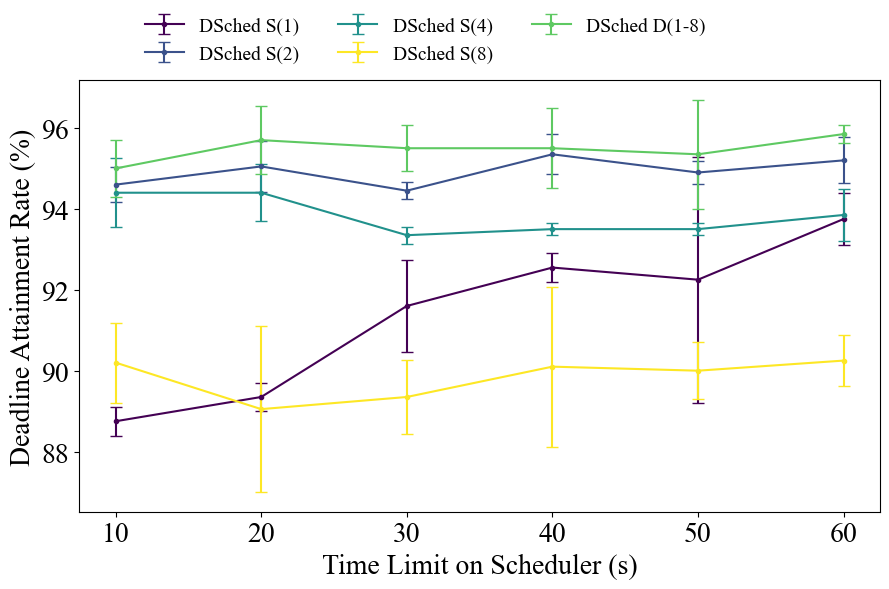

In [242]:
fig = plt.figure(figsize=(9, 6))
plot(time_limit_attainment_datapoints)
# plt.legend(fontsize=11, frameon=False,ncol=3, bbox_to_anchor=(0.5, 0.75))
plt.legend(fontsize=14, frameon=False,ncol=3, bbox_to_anchor=(0.06, 1))
plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
# plt.savefig("ddl_attainment_vs_time_limit.pdf", dpi=300, pad_inches=0)

In [71]:
# plt.bar(xvals[0], [utilization_at_p99_datapoints["FIFO"].mean], yerr=utilization_at_p99_datapoints["FIFO"].sd, capsize=4, color=fifo, label="FIFO", width=0.15)
def plot_bar(datapoint_collection):
    random_key = list(datapoint_collection.keys())[0]
    x_axis_points = list(sorted(datapoint_collection[random_key].keys()))
    time_limits = {}
    for x in x_axis_points:
        for sched in datapoint_collection.keys():
            time_limits[x][sched] = datapoint_collection[sched][x]
    barwidth = 0.15
    xvals = np.arange(0, len(x_axis_points)) * barwidth * 1.5
    for scheduler, measurement in datapoint_collection.items():
        plt.bar(xvals, measurement, label=scheduler)
    
    plt.xticks(xvals, )
       
    # x_axis_points_labels = [x for x in x_axis_points]
    # barWidth = 0.15
    # xvals = np.arange(0, len(x_axis_points)) * barWidth * 1.5
    # width = 0.25  # the width of the bars
    # multiplier = 0
    
    # fig, ax = plt.subplots(layout='constrained')
    
    # for scheduler, measurement in datapoint_collection.items():
    #     offset = width * multiplier
    #     rects = ax.bar(x + offset, measurement, width, label=attribute)
    #     ax.bar_label(rects, padding=3)
    #     multiplier += 1
    # for x in x_axis_points:
    #     for i, scheduler in enumerate(time_limit_goodput.keys()):
    #         plt.bar(x, [datapoint_collection[scheduler][x].mean], 
    #                      yerr=datapoint_collection[scheduler][x].sd, 
    #                      label=scheduler, color=colors[i], capsize=4)


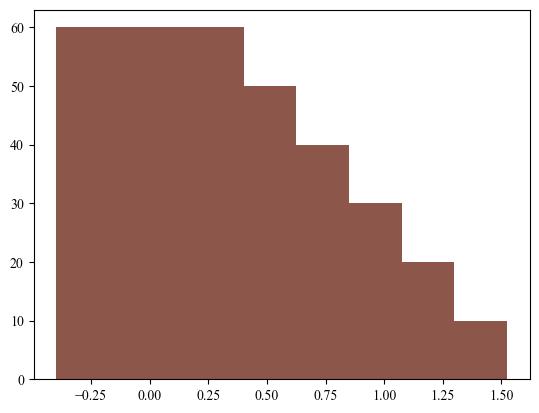

In [72]:
plot_bar(time_limit_attainment_datapoints)

([<matplotlib.axis.XTick at 0x7f58ec931f10>], [Text(0, 0, '60')])

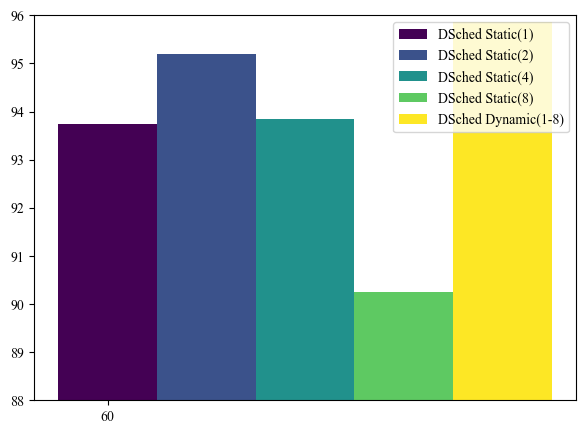

In [199]:
plt.figure(figsize=(7,5))
sched = "DSched Static(1)"
# x_axis_points = list(time_limit_attainment_datapoints[sched].keys())
x_axis_points = [60]
# barwidth = 0.15
xvals = np.arange(0, len(x_axis_points)) 
width = 0.9 # the width of the bars
multiplier = 0
for i, (scheduler, measurement) in enumerate(time_limit_attainment_datapoints.items()):
    offset = width * multiplier
    plt.bar(xvals+offset,[measurement[t].mean for t in measurement.keys() if t in x_axis_points], label=scheduler, width=width/len(time_limit_attainment_datapoints.keys()), color=colors[i])
    multiplier += (1/len(time_limit_attainment_datapoints.keys()))
plt.legend()
plt.ylim(88,96)
plt.xticks(xvals, x_axis_points)


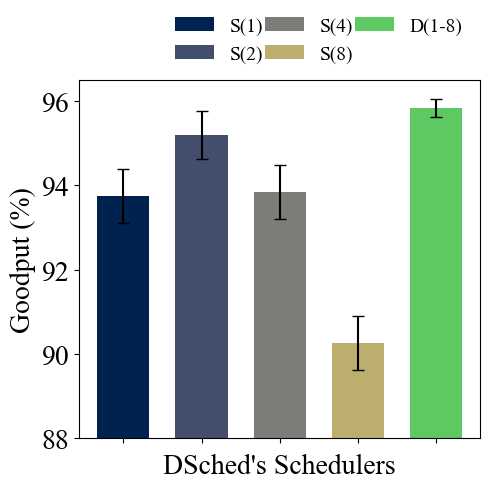

In [264]:
fig = plt.figure(figsize=(5, 5))
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
TIME_LIMIT=60
plt.bar(xvals[0], [time_limit_attainment_datapoints["DSched S(1)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(1)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(1)"], label="S(1)", width=0.15)
plt.bar(xvals[1], [time_limit_attainment_datapoints["DSched S(2)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(2)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(2)"], label="S(2)", width=0.15)
plt.bar(xvals[2], [time_limit_attainment_datapoints["DSched S(4)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(4)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(4)"], label="S(4)", width=0.15)
plt.bar(xvals[3], [time_limit_attainment_datapoints["DSched S(8)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(8)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(8)"], label="S(8)", width=0.15)
plt.bar(xvals[4], [time_limit_attainment_datapoints["DSched D(1-8)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched D(1-8)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched D(1-8)"], label="D(1-8)", width=0.15)

plt.ylim(88,96.5)

plt.legend(loc="lower right", fontsize=14,ncol=3, columnspacing=0.1, frameon=False, bbox_to_anchor=(1, 1))

# plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# plt.text(0.68, 59, "40%", color='black', fontsize=16, rotation="vertical")
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xticks(xvals, ["", "", "", "", ""])
plt.ylabel("Goodput (%)", fontsize=20)
plt.xlabel("DSched's Schedulers", fontsize=20)

plt.tight_layout()

# plt.savefig("ddl_attainment_at_60_time_limit.pdf", dpi=300, pad_inches=0)


In [251]:
def to_ms(k):
    return [x / 1000 for x in k]
def to_s(k):
    return [x / 1e6 for x in k]
    
timings = {}
time_convert_fn = to_s
timings["S(1)"] = time_convert_fn(
    [57106,25558,161297,62011,27211,227333,535598,112932,70428,321533,448718,363437,513909,623054,546456,403126,508256,315501,310619,706922,438295,406194,740564,1750699,626946,571908,539338,327071,236924,288494,991979,1025035,713810,602585,630887,1001403,899886,634076,1210765,713750,941749,1658077,920757,802657,680925,652547,624723,747734,809770,1361526,1036384,1594744,820422,796684,46454012,43283845,686302,919850,43773038,1552538,1160980,3551747,1709535,1770255,2291488,1452626,60047923,60076855,60083107,60041466,60040604,60086681,60051617,60532402,11460332,11641707,423102,10398632,12748812,735824,60074524,60170734,60079938,60065900,30564108,1176416,60063746,12031763,11384926,12058549,7306926,2370754,715237,6569425,620405,1281098,4750398,2366258,961260,1299784,1034544,1111860,60151704,47161427,13602437,11408030,1271146,1054295,918306,11419958,1368547,634648,16697383,14660477,630471,16013598,14223335,10623425,601749,46364654,855722,40331889,49788935,1366822,40714992,884271,60050929,54864081,849255,33586296,23874608,1287016,27960247,60086362,60057961,60071118,16589778,2521661,16104714,60081625,60041044,47901501,11985867,631040,10507676,10634453,1002220,11259243,846929,10673629,626289,837503,2250593,32068472,995742,1074545,1081111,32186877,1827864,1303350,1287515,1269903,1015448,3189940,60054264,59531925,863407,40968826,820799,483555,1488180,1122394,852911,658333,11333140,1679015,14038354,659072,1877216,60269361,60075914,60084791,23217271,11833560,925703,11921457,17366632,1968817,11934615,9684147,2228247,16015599,994300,8720163,661855,11171144,811493,592420,45813534,8872231,1184654,51068301,11981798,984466,47322308,41584621,950974,12358876,12697004,615882,60060348,60050475,60406502,60399649,60046620,37133309,562890,60108777,61592082,60374895,60155452,60055638,60057411,60044770,60043760,60143902,60057950,44216263,706312,1902032,901886,1018614,13496018,3238517,1043494,1328527,11572146,1084616,12367303,857089,963719,55574945,2335288,18291599,1163212,12904868,11925263,553890,60122029,60532311,60077371,60058894,60286201,60109936,28481685,15642490,23272911,19107459,13692747,2874498,666540,9372368,12658171,1183789,13518226,8525605,667042,10746073,8357260,7976335,10633587,540937,6373758,8305818,13021082,7180110,8341811,12327990,1299996,797825,1004289,10666408,561330,21737855,706762,1755055,522698,11098447,1550371,13482438,553964,1281853,1033677,722296,852096,9860902,1980495,1181605,10522866,2288284,978607,2640720,845976,900978,1324608,612391,873739,914207,805652,1773121,636887,4058179,866713,3472382,16222029,589910,12312387,1194411,1425342,15296133,840548,46456666,16153953,1406094,11878517,11791791,596964,60267035,10007248,10746332,60292652,60103388,13475443,49465628,42111623,1111181,895533,699685,906057,27092732,6959871,764075,497745,1545561,599857,613873,1151903,2756414,848144,800158,776693,768086,627743,595189,600423,639907,660225,1119449,1150566,561699,666204,1123155,3980221,505722,518757,803304,1955479,3024013,631656,987847,2690383,1090686,13615496,13712662,865403,14551393,11291691,548571,12090207,9896587,770230,543828,12344967,3088336,732493,60058193,60092591,60042584,60057317,11518903,2187665,1103510,7889588,814248,12155257,19144981,15861791,20546174,1383894,1213344,45642559,1180974,60061222,38466075,60268091,58583984,877670,38336925,59824370,678348,60129313,60296508,60204297,60521814,60547425,60082843,60050848,60043112,59893868,32457722,1998779,1314168,791193,1617285,1219999,1215137,975661,1250618,764454,1059469,14596393,9894741,1285949,19745348,1283722,642468,571753,2840409,1526354,1108314,963887,1221849,1165425,1493231,930775,1578373,1601654,1002666,978795,1315071,1644328,1829479,760967,723308,1357866,633898,871206,3161361,1507116,586028,680284,14990908,1381422,867941,60321389,60057682,60132465,60147277,60127011,60065542,60066117,58491356,1102682,786760,37794202,1135328,762078,852523,751174,999028,648857,815767,32578426,1265077,1243395,8155216,800854,1018820,41870835,1532132,1435286,18568500,663211,17590215,678779,60080954,60205738,60184990,60242524,33608005,728153,1014170,54787203,20606084,60975890,60189625,16655833,11404728,5380178,1298743,1239711,38209284,677284,53872127,60317541,45059582,52793707,43769711,1142513,51577493,23036188,60062012,60053888,60085279,60502504,60050210,27247258,789252,8278281,8514516,780628,502696,6211797,1132998,1164677,615502,753305,503733,1264375,1430732,7162439,2020088,1429178,3047557,1298921,1165801,48352386,939346,48353050,52134280,721931,58499851,61382457,58684160,58026670,60044668,60139644,60043737,60502971,906790,606384,640031,869664,1045445,855567,1243135,1457594,1138628,857088,867189,995434,683778,3332022,797481,1060547,47944495,862303,27658825,40419877,1466523,35231711,1187983,45664038,50996897,767357,49520878,52382256,934158,45208598,39019767,675316,49198885,49431048,43874912,3010382,15293255,2311543,16663746,1541548,1103337,1118558,1315056,924555,1636185,808281,1841060,767541,776364,610373,894205,546644,1165026,641556,1377087,780478,469811,1217604,924645,558358,1635746,1107810,1086119,14398011,15846960,13053460,693848,17456742,1396498,881407,14775381,1370373,12031857,7687576,383281,8164034,11102180,585791,11913078,11552528,1004642,13513316,778090,1048987,489196,457106,9002043,3084878,965052,488923,9997602,441567,15174158,12759424,1141694,16274541,713155,1100131,60261895,60056267,60240090,60045083,60186669,24146984,19187906,6390290,6789758,38394048,1325021,1425840,615263,2620562,1044822,1008579,32755602,1176624,1661501,956380,22131378,595146,820715,910295,852761,838425,1136907,2544769,2166762,1789637,886256,1001260,933665,1341851,823155,1302961,11013490,29821676,15102802,52911493,60075094,11644400,15739352,14704284,490507,57198835,60831282,60051232,60108256,15189371,555394,60168019,10002398,550908,3246636,905256,1173839,1814707,37411585,1621853,1094315,13396845,811418,683542,2290278,1856146,1107271,47586659,57859868,1110814,50365341,1230404,1584880,13173134,1645080,20666704,55459511,1194585,60040750,60053984,60057249,60072624,60045463,60036618,60079423,17491855,18933772,11284214,2183931,964578,37299765,924351,803602,14115119,2452996,2099742,43567737,781243,1381546,14044615,1190049,705902,1143808,899909,928450,475458,1210193,741918,968886,1126548,1374707,12864591,620603,12761973,10846569,15684862,828259,1862766,582213,2386066,691633,1067675,1013453,2081109,1432575,36328685,60067892,60073532,30007948,1147004,54653220,60047541,60058413,60189051,60064547,60085781,60105894,1226263,1073930,983808,1917681,891165,1057937,2194563,1740310,1248833,965004,40840188,886547,1896619,747587,1562214,1197349,925594,952037,1466611,753153,1358670,2692840,981927,2943341,1779372,1653691,973059,791652,1064227,55487988,52220303,1466110,57510459,57311865,1139560,60053551,60099283,60055865,49334400,14035681,17450520,6956470,60299176,28372248,9265076,60054256,9078194,60041404,11626478,15252364,543706,7133058,482109,758969,879470,635620,1164517,5645925,1025789,5515155,8316536,11251689,615414,715856,9044765,3096082,1089185,764602,1734430,664735,2237287,805810,9714475,9083280,493985,26615206,54993993,1192060,57415946,46145054,724731,55350963,57143723,1032368,60167365,60064301,60223908,60060379,60047811,60059174,60054905,60076106,60053488,60053247,896712,1040234,1011699,919214,1012592,768892,742041,1859689,2481298,2420901,1754413,35900500,42042123,862908,41452336,37192309,1517209,25323302,5955900,1469790,2216068,1664028,1272587,1484079,1563332,2093404,2146746,1224198,1434750,1510904,734956,2194851,4060114,1059962,1452287,1105522,36932649,1009627,33046755,53388492,918917,60067925,60069941,60056478,60360405,60065239,59210784,60233582,60076470,60061672,60947464,52968810,2269450,60145796,48343840,1975032,2494242,1702132,1344269,60094026,58318084,10763626,9927212,1002977,40943302,60063755,48215640,51715255,49279755,57815560,47690092,1413108,60056488,60252724,60139779,60152654,60058698,60213033,60057293,60090552,60056634,60076839,15702387,550677,7166892,1452612,1003336,33221827,724957,574392,841666,396935,234876,358148,62549,436223,148909,88471,85968,67172,21572]
)
timings["S(2)"] = time_convert_fn(
    [29161,15867,79425,450105,18552,108599,175830,31575,33050,21698,99661,81697,104435,125643,155934,95222,68565,37858,48977,136238,67248,106302,131985,727775,110022,112099,94965,89172,80991,61001,231031,209510,120907,126021,137410,168560,209104,132401,190604,146604,232032,553452,232215,162261,168375,390603,157435,264235,177850,176824,189101,772111,235482,229385,180091,2976756,466396,182395,243978,282582,164517,806856,194768,276666,381797,452125,579152,236859,6017003,840500,5135902,4565328,289555,4352078,5602720,23075687,542073,60039427,60134458,60082816,60069783,18463455,142092,7848077,12337330,109562,7099881,2672278,1050154,1108146,843329,426899,182564,105334,353531,329880,2742587,359269,108295,856718,331232,447216,197491,240075,2248606,271539,777508,416279,158568,1928081,182152,147618,2411132,8576153,167427,31422184,2388817,2216230,1901550,1301079,346519,3543935,450215,195153,3203256,242017,570406,370733,299510,3747809,4497899,1172849,7374930,3082129,138394,134871,2346436,182106,1718445,172141,241001,2421467,256912,266816,1912360,109583,117453,377866,151301,1539701,1650973,164150,1209312,2665804,675717,4421614,201194,540624,1389641,246169,197919,628554,566672,1190265,7529449,808969,212508,394797,3285770,207804,219308,208696,883326,234783,4225879,117834,1961490,138403,178660,9082428,9108933,19114650,5917073,2820000,583306,3872711,433263,151650,2158080,1728568,133859,1663866,1822630,12841595,134909,60089788,7873949,161076,234898,1666772,291856,3162067,366510,230992,4114294,2192527,231409,2471956,2783697,209966,4928203,5006530,3692323,480453,34168689,62690999,60244750,5163516,12508243,297697,3485338,22373070,11813522,10473932,37467590,794417,32117729,13969703,236227,4523686,3312222,265747,2502148,3258557,2409373,2624753,474680,249347,255742,184768,4568431,2757397,318059,3036980,202163,2481929,17222992,188378,60196233,8992374,6050864,5576374,33856631,3282395,60150965,15421761,1684147,1582055,2310037,496364,86604,1771901,1504591,140664,1864588,1534468,137570,2118330,5877321,120786,4299807,1978539,2583340,2706217,2353237,1290207,1319067,665601,131000,187385,217573,1029814,109606,261931,115223,112996,1466303,126030,127439,1613631,114029,167170,110412,1287903,150080,1171406,143800,189718,1471651,152758,111908,162974,130213,121808,129552,1571022,160366,209437,115726,158878,109093,590599,400411,1224336,2848892,210313,2568032,346696,176355,3281959,233425,4750742,6622717,161314,2881124,1539551,266828,60136423,1739093,1362061,5042286,6559531,121035,2906735,2244214,301592,207372,183626,741404,3236987,300359,249276,1353539,125693,158986,264022,166761,435694,165912,211602,108952,141956,134471,149468,213444,121155,132010,252441,153780,102991,140580,155347,561744,142638,106582,229659,238087,955508,142196,253297,219098,166477,268413,3444172,200332,3602719,1976767,155243,1685872,1870935,164745,142556,122043,3346736,626892,7730778,2405024,450773,3348749,130936,2888409,2884942,5373772,356204,3212729,4025905,2014302,1685428,273543,2132579,1755351,4282862,3035031,2122879,4551804,2415548,461464,2162343,1808533,359449,7032816,4367859,202498,60034560,8712838,8335542,7629272,6662820,4315898,3786099,678290,228400,249706,488343,670485,136448,116532,182634,145181,124050,2631433,1732591,123990,1518643,193141,126832,127653,774579,398125,357206,208340,283972,2948667,243470,535012,414499,319478,767644,805234,201042,1812241,277159,124527,175316,229963,121930,121943,1838230,226337,131252,409442,150804,190566,176016,846948,278697,5873986,204747,413559,1028506,4635557,324680,268724,390601,275247,324158,771931,322444,3857249,191748,4138060,242435,2358156,383929,416680,2316224,590320,5770204,6654638,424916,884843,6561347,396675,6863896,220873,10695813,15594268,8434784,27691779,60621855,60048097,60110535,15057498,2490508,3655125,3927781,2395071,2323598,1328962,2770526,468210,4361375,178182,8134296,4070435,221497,3411520,4140377,2561400,3097269,17680732,131154,3094174,62220929,60077429,60143032,20104325,4064408,320461,152719,469366,2240052,137651,185108,172846,135299,229707,228481,185643,199069,1175921,243293,185745,447708,195818,249478,4705548,693816,4516498,1030504,264863,5636982,3388368,327149,5704667,3250874,287007,3968687,226169,253704,233870,190733,302895,2338536,628153,224536,319880,304059,254748,189636,190924,1598266,1088308,252908,358050,319231,830221,5124574,2687763,254463,5253674,663000,6928607,2981473,268899,3769531,3001133,892139,5074325,2216587,8941964,18492052,8987076,6130546,1321814,2995243,414353,2840268,246036,1001074,247723,216285,2094239,684194,477342,3383658,265461,287414,682822,227911,252721,118729,174542,115955,151510,164260,193857,236931,247198,167860,160504,244838,287173,714371,196067,298016,169806,154122,130389,2562677,87203,3610085,3073689,108651,1608354,2343530,167755,3081370,133479,394439,3562280,167734,330914,2968203,137462,2017174,839096,205231,1631573,196139,137059,3673292,2987724,232472,4939248,3496174,3772291,4631729,3797726,224103,5933883,17615097,166797,1611792,1563601,4593748,4011563,1245101,2182767,1620125,1530120,684446,242338,775363,154428,252183,226929,2339584,435814,741351,3109896,973219,6380177,474787,442345,1148260,283358,330503,192465,487683,2965943,517328,247321,10552080,246793,3537062,352904,4045930,179810,175621,3518768,461508,11255920,60169396,60524371,3962472,557347,99246,180859,106456,120729,1159767,135237,146845,150240,397795,164614,363827,134060,4047081,267998,418274,889072,469582,321406,4225457,362201,5383065,507650,208811,2785741,164859,3057491,4652604,411982,15418338,3461682,3264524,34996332,3109997,2975312,5057679,2929114,4497758,7232460,9267862,302887,3574202,3409166,263697,4678752,198881,374979,4668971,197928,244523,4234518,191370,210303,517284,236575,125989,120602,1083824,130299,1506839,73983,252187,1314863,314857,4055949,3557508,2247952,1916367,1794700,135109,198364,1578250,1778769,2877313,2861072,259583,3493531,218448,148304,3739283,200016,2099801,3297751,240693,4722574,1062738,391558,5829557,546624,468109,6758784,583909,251331,3274742,830397,885613,576467,5883599,628226,492993,361417,255235,1070005,6485029,2607355,198430,4306784,2375442,207258,3377895,5938724,674718,4331569,4322371,4860792,3513190,240397,4162159,14356877,196685,61976612,60246613,60129338,26418891,6955937,4683726,7011737,5403413,4614382,2333364,60295263,19681148,30389579,2376896,9683827,10636161,23523905,124847,202838,453024,107557,276001,1516526,115166,320307,1490718,482706,2167252,139726,2191512,125160,111932,1753627,610070,198875,1904838,1781057,162101,1958506,223567,1761409,3457841,3323059,2468990,2736101,237413,3834832,343969,337440,2774344,3290599,351343,3144416,3826051,1524434,563456,3323998,9295375,245967,6397866,852364,5214913,12041443,4531779,295048,21235673,33623347,20551421,60046826,18625760,11673815,514853,329064,4959050,3774575,347128,4345123,9507107,956846,4288097,1787823,511160,301734,1300644,620450,281544,3837788,209516,4719881,288895,534319,3283935,3749332,489000,6234229,3322916,6765764,3842438,7985671,142118,11690888,61884820,60948485,60084367,16289349,363635,6486655,6771751,225990,10621388,5586953,5625153,4261923,368826,449790,3673340,4133981,691649,322798,427685,814830,5047181,5003059,8715781,10532932,443229,61174069,23661753,6195853,4750620,6008726,6626934,3083331,3343654,3781163,4645295,23383091,351958,62441822,62790617,60136797,14703874,4530369,18912594,10282430,4688327,13252508,15534014,275741,2495820,6320828,5924148,220891,94649,122288,166539,40010,60021,32766,49784,41499,33419,22264]
)
timings["S(4)"] = time_convert_fn(
    [13703,6781,34200,9964,8209,42048,53239,25276,14673,12703,15388,25534,31962,32069,36337,27789,21242,17539,14362,38732,11592,22879,33747,206442,30820,19244,14505,12802,21134,14468,78875,60454,36375,43912,43972,43863,66719,32545,51958,38757,69454,159313,70510,54643,52096,52964,56801,66575,61795,67578,66878,215534,67274,63251,56656,88252,58748,53973,587687,555310,47578,278305,100164,51539,758818,714960,667481,66690,1362170,1270671,68698,1158603,78323,1177992,2043739,12242535,49034,2205307,60123694,60036266,60408433,15907170,1887986,2389527,3216438,577627,955906,715190,579769,715144,1099118,697238,62231,52410,44444,80478,198231,80820,50837,157155,84808,106827,47456,56505,53324,73780,55643,78552,48244,62099,71688,126470,783657,856236,60009,551952,1143800,679779,42980,342156,98034,51225,113321,58444,59497,67283,745228,125335,70206,844435,657976,97750,698223,700351,45358,621056,973368,58944,555760,65290,44997,40255,497770,50111,468245,492309,38744,92067,47856,399533,64621,66268,324102,646384,85612,56015,54867,64099,428281,126001,2475388,172428,117603,109349,739507,897409,70391,101769,678659,44454,608349,165287,95614,516589,499259,85729,521907,50665,153562,2437052,1681151,1143101,609712,515979,58069,928923,606641,60370,498642,409526,85186,881301,333285,1673441,54487,763180,586030,137865,2770193,6881520,3018487,2587284,688168,57590,2087735,1169302,53408,1020759,1237227,44365,60061461,6083528,4339900,710381,5440926,60048152,60120152,4882689,241809,67526,863361,622483,85686,924098,908558,69832,1035908,1798089,58630,1255022,1318843,83104,1238335,588086,667078,733789,705192,48424,625118,42808,614992,491414,64219,6235476,2444123,5010890,666237,548942,637017,66397,78729,418244,756356,45574,397868,32272,2140686,400048,723877,570442,26548,1548142,2262219,49207,658355,1367299,1227956,622963,2521452,39391,1905503,920127,1988984,2750353,476708,421235,823180,158697,437161,132312,956220,142351,43632,423545,54438,33607,385971,51446,53318,369101,58714,85730,46369,234147,42181,424293,54711,49452,348099,67565,49651,57284,54589,48281,52868,485114,62837,43626,48519,44959,42977,173576,55435,699730,915379,34735,768231,55271,60798,917110,60364,668518,611889,99265,512168,542321,40866,735755,1009393,54893,3837440,1445201,716951,568115,545309,73822,54898,456315,51648,438346,45470,49327,1071626,40612,54428,48383,32742,482473,149069,135902,446599,46822,46183,47175,431119,55153,75861,56748,47356,34200,47252,1441361,198918,74410,137106,89774,52270,185135,123314,96831,86030,50276,853576,61570,72224,50349,494686,49905,595756,415297,52750,39036,465962,1865311,57354,2291357,4047028,45715,2203749,39083,4473846,1590032,550841,52809,787932,1474366,665720,652345,62716,611566,509734,55199,568426,47783,654534,567495,46879,1854349,451538,37491,1374290,2005964,58114,2215820,1164553,891302,56504,116539,60511,80816,155421,68647,1030741,902925,50932,582633,547314,43395,1023718,142459,777019,631842,125069,714540,1218432,70543,1084057,2282354,1098352,71042,1916164,86027,2520457,1601672,60640,1063395,75096,55308,58531,51710,726947,61725,39537,51410,114554,39226,352511,363621,53461,38826,52263,359268,71119,1081677,858222,68357,1704641,776594,90368,1255955,70489,91205,71780,124296,849570,64954,71972,791659,645272,47830,114658,64803,884181,71021,623282,760252,68233,70986,949820,74018,1069723,879336,54774,1159504,50765,1628557,2400317,1222563,60326776,7906641,5001232,60218628,1327323,547773,733647,544338,50332,54450,528648,57147,524944,623170,74679,472463,1714739,588972,2399424,850494,50840,1912190,2893797,3101686,2798546,4925292,49403,2446549,2454787,83635,54937,686570,52126,483297,513651,49420,51688,41031,47919,36250,66781,483150,216208,53471,50465,113218,61875,663555,194798,60477,727543,729867,66678,1104765,9257900,65215,18609638,11836302,74090,6864157,949781,599721,494987,67688,81204,527035,55045,58299,88776,55871,56177,46356,49359,65451,207161,74936,87677,94492,60276,616271,85643,140275,67662,56604,1216965,821332,47699,1095758,1337998,46618,715480,1093496,49277,3166836,2208765,927851,1005272,875020,651616,988926,55132,85165,584727,92096,71688,64147,80877,724580,105804,52704,51775,44181,41144,53113,44154,43976,42065,81920,30646,43998,48738,65426,43786,38532,42098,53400,44090,50707,32896,71374,57370,41334,38289,541712,32484,34177,432158,37506,38085,89913,419862,126663,584864,594684,58549,663705,46722,382731,208955,49297,440760,845543,95864,2903441,1348419,72048,1220213,611497,1098894,863342,812433,1083851,777589,769354,61350,1766259,814161,54790,454420,336253,360561,344504,544269,43023,40261,216789,470818,53204,61922,57264,152612,88798,129826,160426,67507,94755,174670,417052,53736,144706,215147,57801,67854,48922,123167,1691414,43998,616116,86599,64213,698162,107139,927638,33670,1148421,3519218,65501,11908980,499816,526552,708541,26853,28281,196294,40586,36427,55888,116306,61400,67935,541353,88667,98909,121097,277880,65736,772890,261712,61360,1027670,78546,70253,852039,54192,972881,5229150,69961,60163929,4292769,591094,2071020,7173405,868686,5591107,871611,1232974,3922544,970033,67785,789277,70668,262352,2920924,56321,153194,1504568,1099555,372867,1930784,80710,81549,82063,729737,47410,393739,86392,49953,69052,34038,107214,40286,63042,499570,42244,508489,47608,460245,731492,49843,570130,822104,332969,115014,80817,233526,57081,156941,66279,90904,354610,56254,83914,1242127,100550,61015,1091043,83519,353728,51056,48653,635644,54300,242863,223045,68386,70346,49435,54123,101808,51458,66621,128180,115787,55147,130609,55848,53877,248135,608663,63836,147794,922411,64162,837245,48511,711014,1089530,75640,929662,1673133,56824,1313691,6551507,12865669,1453382,60223334,7596316,60191567,60044046,8221123,35917478,284058,649328,14028122,1713594,403199,304228,361761,77278,65102,36871,34111,89245,43578,77810,39649,57875,82279,46525,37374,348943,121604,75288,469796,45600,49045,58400,54273,592217,41060,52219,407779,141543,46691,1230861,95877,56142,922441,1047647,60511,932969,659968,2369590,86587,1323239,1159309,3138577,2463272,591393,498261,997534,1599954,105685,8882539,15172605,15756017,61754625,1613272,1692900,142827,78870,812279,700725,101161,939988,1949438,1310022,1431697,1012361,138487,73698,151382,79252,56964,1424140,85116,82084,929915,56508,663638,682679,55629,2685279,1505115,125920,1215728,917392,54397,670013,5535565,87392,2128519,1888303,137373,4902118,4975292,2574989,5244248,317059,333949,141482,715327,86798,645604,829916,1169356,5968824,2975536,83008,4334488,60168492,6636990,740281,64155,853890,2275297,73625,44457097,6156947,1030234,679601,610082,1290875,599575,1956335,81697,5022842,83070,61545500,2808083,666227,2573434,4371535,686523,429050,6425584,64228,7785031,104237,2643558,125088,31897,28273,56986,18754,24864,25434,23096,12354,12914,20356]
)
timings["S(8)"] = time_convert_fn(
    [7180,4317,15688,5143,5403,21832,22685,9209,9182,7472,11211,13192,11554,15627,16994,12223,7972,8506,8831,15273,6626,8613,15465,55335,13254,11752,12571,7282,10578,9232,26278,20299,16301,14884,15905,15372,30728,13985,18868,16894,24481,56284,26287,18701,17564,16802,17836,24001,24257,25438,22821,416720,25553,22928,21080,276161,22188,19203,24730,248346,18376,85474,292984,20969,88766,290546,328176,69625,435257,412877,31600,474654,23510,953477,2345270,1063714,485822,17320554,687785,39007,277336,733312,908779,427385,371780,343537,688228,771377,497414,144466,157147,58044,18860,222136,51825,22190,876042,93577,24970,75603,32737,33343,26925,25467,150448,35629,30872,228652,29336,474807,460217,57520,1283749,500108,36851,457301,484284,613621,27118,283755,23164,462403,526942,23710,607335,25045,330052,40244,25271,359756,309396,44070,328877,322865,17859,586103,19493,26015,208758,34935,22122,20562,174238,24106,240415,283449,15550,201585,19174,201649,205733,21636,382769,548844,23333,25137,20751,22370,396991,26551,31379,35948,31088,46958,367423,29999,29106,339291,228164,18260,260764,23114,27085,182297,167402,16749,166876,14310,18568,450895,329556,267387,206268,212534,18873,264805,156195,19341,224543,189840,22038,60037761,239026,303622,23859,294374,232606,21443,633889,28842,19615,402624,347686,353372,577715,24655,23502,571569,388120,18078,3962883,567054,1278214,397073,390920,6553627,23765,60067384,935023,1119316,2282735,456104,569078,1501203,60084472,442877,659253,702030,24365,410957,33111,22885,377652,472130,558550,263989,268448,19502,227545,17156,243120,229519,23132,442459,632172,3469690,487346,177113,386215,147829,23605,277713,635321,55408,347421,18020,1967263,135920,185847,487780,11696,166245,363918,30499,216592,184089,22691,246817,36942,16120,401857,33086,215622,19239,315380,208744,28142,275588,238953,24651,270893,284581,18383,638327,212185,21886,310696,279499,23421,460453,169966,261144,219439,132548,153994,22245,203200,28153,136940,25292,20698,210743,177980,26088,174049,262022,18894,145704,140659,15387,22591,65938,41772,91294,212007,15469,723350,288600,21392,319487,30559,365092,493326,308566,3590068,999126,17691,182045,199501,175534,601833,393565,27321,28253,41055,28305,23131,20856,23450,31791,148081,27050,57313,21911,22047,17814,18513,58120,22886,24868,15663,27654,19431,21137,251635,26507,19405,18372,17838,15135,15030,18283,85218,18231,181687,40727,25773,49871,19141,26558,22175,19275,241527,32472,65096,248958,18506,18071,199147,185074,17975,25150,201256,318052,27247,372553,291562,269084,744904,15877,625985,420896,158020,41402,202102,324060,219637,21684,35341,223618,194603,26779,20927,94366,381902,192406,28252,201028,780360,20211,862143,1115267,25769,774917,1183745,303118,23520,49851,28103,33791,624348,29346,40726,674425,23441,250105,454875,22020,257081,18370,346133,290351,21467,454109,319102,19286,232585,306663,30268,30162,360051,21334,36175,343607,21243,615840,24397,268245,21479,20639,192182,37092,18448,20593,163813,18535,144848,80636,19223,15047,18435,18281,20502,19182,599892,29147,850566,333287,46541,849968,555359,33174,31662,49044,541976,295023,27964,345293,871236,24023,942537,296127,432606,283865,351350,195946,56388,28063,56343,88671,542780,340971,29362,263601,19739,518246,508879,405931,4999523,60035459,465064,743606,183580,17251,375929,15125,30299,25586,401724,23275,310163,636848,36456,602245,354566,298957,871701,333754,21572,226423,268690,26961,23568,4208865,19948,60045266,508786,294710,147371,20619,28481,19002,15789,16875,13884,21600,25983,14825,18949,18798,66454,19159,19534,27465,18115,18315,258013,25220,321463,282324,23795,316274,372607,23275,289298,539122,27732,292561,23144,23638,30048,20673,64290,301372,21024,271684,216398,21706,22855,18563,21318,17609,111857,23740,272665,286256,28340,263118,299567,56004,305036,25135,388642,371408,23018,499946,1800911,56272,24437167,234281,235885,473656,264256,352257,108795,909300,27731,657782,48919,278288,266889,27581,27802,35061,21613,230494,27113,27923,20449,18676,18771,18470,16756,16966,16114,20011,15483,39284,18467,18937,22058,15134,137429,18595,136187,20806,170298,18700,17832,319712,11538,154918,251159,15628,128137,121884,13693,233299,3169039,36558,2288956,195112,161092,193066,18138,243835,81614,22251,213126,190808,24448,284541,249713,22527,22156,425680,36440,12661280,1006697,803636,403560,236162,242136,1093852,289745,257495,394550,50450,18772,149363,97316,19946,58194,76746,20312,23831,24260,26056,22465,38806,97835,30901,248017,32369,90332,75703,34748,27639,32043,23752,23464,19460,21615,1016853,19945,282017,33563,710786,20581,16748,950388,16599,3726079,252092,180927,264255,200878,175815,193302,17641,23726,80144,24013,18911,21098,28236,30521,34414,209387,333168,21689,56503,108992,39470,570487,381076,25491,24791,316172,25024,326837,21001,3576476,910502,655968,1462386,512835,359695,683752,485449,339910,351418,301667,925751,176084,403042,41746,245851,33948,28028,329999,199686,37140,327520,23353,53212,278236,22124,23925,21265,20999,41128,176634,23562,19627,21863,19710,52391,15606,19591,29173,314586,188039,16259,179907,16477,17680,159112,26544,22219,276342,27449,212150,24105,24270,504378,31183,535433,1220603,27170,436034,261252,228979,914548,25989,50114,248271,47772,457158,283385,403819,40099,39178,447913,620309,817801,1258865,24922,23415,51813,287249,25791,947288,32737,23959,515678,23813,32179,37349,52560,440513,28955,31336,351750,420149,31788,615584,5514134,33957,340950,1675471,2049291,3370000,3904970,1740025,1474871,760582,741330,60052967,60033607,2408653,588292,1631701,324135,18636,77848,410852,258103,31472,15613,355554,293333,39633,201521,30244,42152,31948,16711,185222,199489,25956,22218,226520,25189,244588,185120,239852,19628,16199,30596,100295,23084,291194,42631,33941,336110,345288,27058,476700,361447,356699,83808,366848,599294,281994,720250,1033783,238382,320765,41928,32084,657190,473050,1078749,501493,1461280,25907,299353,24162957,268116,589198,25898,9471002,429772,647473,777715,437376,37928,28600,46165,32776,281521,432236,22291,274020,87415,63280,514660,240505,81217,100560,636103,23635,389388,276945,23133,824362,60041200,60161166,11581477,3108940,40219,837669,986338,27556,633073,381972,446664,468604,389271,34556,450030,513470,43640,40455,33875,64177,390127,1164916,5913802,189451,414691,2162831,1206445,400357,1619811,364273,217059,906820,24621,699214,51190838,752535,745417,3230669,26708,6676940,556847,714585,2138870,422042,360202,2986170,1560252,278710,2350580,21392,602241,27862,17138,15074,15379,12540,16543,9459,7438,6417,5036,4317]
)

timings["D(1-8)"] = time_convert_fn(
    [25361,9761,49127,11527,11987,98398,135355,35528,33254,63707,90287,81913,124841,114708,95673,50237,91959,20325,36663,137347,25757,65085,84428,753556,151397,136138,150752,112522,97707,97413,333480,305015,248455,126585,160325,272963,231714,100945,162944,99965,109553,574286,178475,188074,196082,149614,194992,234817,244655,144862,171229,934579,443754,667652,221779,2414543,186575,353664,4348092,2382130,175543,956439,192911,165709,3032548,762940,3858028,324627,8229390,4114363,239759,7851506,495733,7077646,16204738,19251629,584881,62212884,60342189,60088624,60035824,21587784,4493583,35078676,8961818,2395916,20284351,2216466,81864,107444,954481,733826,156614,1590035,246932,248948,3474276,284921,131849,918636,319168,392302,221091,401282,3459818,2352736,155859,1955675,211316,3367058,1048136,482431,3279848,4105290,327374,22392850,26261955,2356945,247896,4281926,205635,3521092,3056961,209392,5605862,325895,3514255,263492,264725,4202427,4131563,392761,6095598,4236378,381945,4996433,2223056,232272,4555805,2617861,182996,2855435,3607147,277048,3704846,744664,386170,2405627,280661,799939,2936283,167569,3951370,4021504,286492,3430492,333940,1017239,3127381,792295,562457,4031873,305062,551377,2950854,281950,277625,2528360,2275553,200128,323787,142719,282271,196723,1636615,229457,2622868,503300,271112,11632339,4823075,3464462,3479442,1384738,355759,7156904,1676424,194592,3881915,380250,251930,2545637,2316488,7341948,560827,9431440,12158473,329085,36311487,13044759,18441287,7884937,3103390,341258,5712962,6611931,758692,8801689,3103916,225910,12572455,56908941,11103250,9410726,32419577,4700164,615946,3087087,20080282,253871,60213296,17420662,3815486,6915719,6743893,2823578,5949887,2375085,75710,1307341,1543382,73821,2155415,893917,593127,777567,675352,64308,936508,52505,754852,645175,70621,2043930,56618,2479425,17708676,63718,516786,5059075,601935,4072837,51884926,330355,60055660,9010250,8008731,5212558,3116389,1101405,129842,2033149,13036175,369356,11735847,8636726,156447,4261813,2766452,1759546,491485,215683,1868678,1349324,3367784,2492187,2334211,474333,1333210,128475,204483,127573,122885,1461502,171690,149402,139390,475853,289465,289233,171167,221451,151550,128753,117948,188955,1449157,236652,2203628,397126,273965,628625,492296,571243,228955,354800,213002,219166,2121538,203844,173413,1635028,250583,2118700,3739609,190361,6899286,9867542,386907,2811651,334705,239500,2559338,396680,320707,1049794,201173,2109483,207240,222213,251340,1525374,205403,2545533,488975,363309,734522,407200,619477,4624888,218953,211604,160798,151905,194529,2564114,283541,658343,219859,251646,3686502,708200,608906,4384305,240160,268157,272131,285372,2727481,241461,261069,238486,695874,315315,1421414,1765468,173530,816216,409145,196682,193824,215210,1878902,2269424,162484,137715,112342,204490,2769279,2574667,7241597,169175,7374642,54785486,397406,3566599,6541551,2030511,1207077,117573,1830207,1279963,111934,145345,1480388,3230433,1445068,1088059,124964,1085296,1589400,304096,156210,118171,2500982,1877547,144873,163318,1566971,254531,9826990,5484763,234103,60252159,6386560,210027,256354,261422,472021,948708,554363,239061,3162279,731003,727524,558983,4028947,196472,5464951,184881,255193,3765412,241838,3126549,254867,312914,179972,3757564,447352,248591,517483,445893,3485259,161666,215980,613294,700957,342939,786119,396839,1665051,186475,175393,231255,191833,284006,136374,1291056,237263,255736,174341,223106,194216,431331,3644030,970685,7494366,202430,360105,6260127,725572,473871,311217,1494872,4000979,735310,1181459,1042391,7038597,416019,4901298,2932448,2326964,197161,499082,7173441,8413489,7219020,9644230,748929,9751029,7521440,431949,4259798,2845491,13797662,10592944,8351583,60118601,6264020,264583,141745,184497,202208,1306363,2602220,251779,168923,299614,156257,2418695,2921623,330932,5155714,5334423,185983,3055016,2080959,4829495,3400675,9000354,154334,263232,7420815,758942,13821149,15912197,1053338,444963,9920307,1220024,6622596,4509138,194193,602390,409409,319185,293109,252715,237724,1999906,394652,314435,760289,217588,506872,2911970,354866,3350466,3011888,880975,8364507,3188581,253056,9495854,3764221,295455,4527836,6903649,531557,251301,274804,282870,3464945,246901,283311,702019,1077968,318796,113493,155052,248440,960091,186345,2004518,4041721,617800,2435025,2264294,419462,1961950,127723,5742074,4709190,633374,3232238,4586527,215873,3173029,8292544,157916,53694643,6635150,4854638,1093334,7178048,429605,7952488,395007,2000328,482381,466536,2452306,3013221,2564519,1079601,293401,566482,238931,434266,197567,146452,151708,100051,158871,189946,136060,173366,121386,316429,200955,168341,2459517,442439,184342,181278,4726871,338383,4167341,3336090,237125,2603039,2855621,120159,1884655,2333595,249168,4018112,8860912,341443,11035365,16547856,784784,10233453,317049,5899565,1300661,454398,257901,5768911,464220,7767519,4512327,324857,334494,5443963,332302,3145004,4539427,6061339,938198,7071407,2395155,4698453,1674012,7668565,1492981,2369334,5831921,915730,3886419,1148737,549557,1987745,403472,512471,5602260,4840511,356572,894965,695653,595956,591542,589862,1610260,780482,282225,180253,175207,126475,1201596,943916,2266166,7519456,688759,2885599,596358,3720079,5208385,8665377,496934,986651,60074771,60044317,60063822,4240574,179045,128668,364051,308593,124437,1753024,243613,188786,374940,563226,4791077,467192,191921,254665,291379,281001,1377167,323296,4656819,5730871,865185,6756281,391853,324280,3046051,210075,3038981,10952680,307021,41094585,5504137,6666760,21285853,6808465,2957780,4743347,6356439,60437644,61935812,4856320,332228,288147,1285952,400456,4667802,5358785,719001,5692595,326854,425915,3344093,2682924,266951,250557,184067,283319,2282955,226856,177114,1114534,229889,237717,2876106,206551,306371,130991,508330,3445358,387612,133736,186200,3612928,376842,217991,2336294,236556,603207,621718,254033,4144689,159373,6069548,3657425,313638,6348363,671082,859862,30695941,594421,1227221,10506901,9284681,6624258,4515946,7306013,652079,416645,282844,1228751,157306,639840,226599,114649,1151444,1098263,142075,845460,5238619,747648,8250402,8430976,497199,9313440,362720,744585,6456939,493820,5129427,6033614,508698,6598146,12055992,531727,61257273,19696808,450756,5011031,3963745,15128041,3113316,61737150,17515000,60087619,60210192,15336748,60027645,6008618,98389,90452,1215641,138817,846583,2539904,377317,2800341,1860594,1251030,3628736,335616,2733080,4859825,3464978,3019717,1065282,378899,274687,1402405,1860440,2201167,186345,2381163,1315549,217873,1896945,5031188,2234908,4053535,427069,403159,1614900,1850297,1527998,2314367,1492125,1333839,3143209,7009142,9211487,189796,5311222,2460764,2493295,4147788,2965389,3696446,6118307,3303449,5627763,4791992,351181,324137,5596885,4814251,5054033,4649737,4489881,5999072,5947761,435895,4450299,2170958,316347,412154,1341812,532259,306444,284721,367590,9728531,1036171,306020,437969,2921395,506165,2421185,4740992,9151142,6953155,7353549,342717,7144957,5399293,577630,42053272,6736565,9028018,6639372,451063,149290,8045066,448166,315189,360692,1864420,2372139,2611329,3000592,270859,2104242,2953461,5198381,21305495,4397289,28953637,31001541,60386055,15825541,4964379,5922344,8476611,11286511,8651961,9089226,1025051,7072490,28856665,41379044,1422770,61543785,60105633,7369808,351703,455551,9694818,43565811,585148,60215972,16768447,10748324,4911263,4235118,4196295,275451,154257,135153,145039,37399,39929,22106,40785,62385,45704,9358]
    
)


In [163]:
len([k for k,v in timings.items()])

5

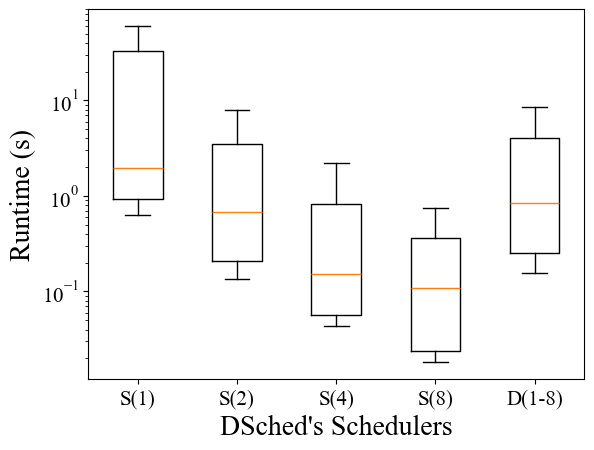

In [257]:
# plt.figure(figsize=(9,6))

plt.boxplot(
   [v for k,v in timings.items()], labels=[k for k,v in timings.items()], whis=(10, 90), showfliers=False)
plt.xlabel("DSched's Schedulers", fontsize=20)
plt.yscale("log")
plt.ylabel("Runtime (s)", fontsize=20)
# plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
# plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
# Get the x-tick labels and rotate them
# labels = plt.xticklabels()
# plt.setp(labels, rotation=45, ha='right')
# plt.xticks(rotation=15)
# plt.savefig("scheduler_runtime_at_60_log_scale.pdf", dpi=300, pad_inches=0)
# plt.xticks([k for k,v in timings.items()], rotation=45, ha='right')

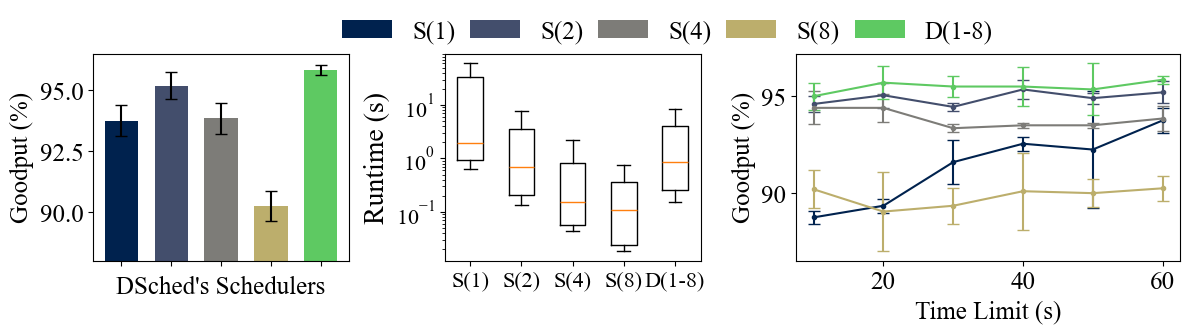

In [318]:
fig = plt.figure(figsize=(12, 3))
# fig = plt.figure(figsize=(13, 5))
# fig = plt.figure(figsize=(15.5, 5.5))
axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1,1.5]})

ax = axs[0]
barWidth = 0.15
xvals = np.arange(0, 5) * barWidth * 1.5
TIME_LIMIT=60
ax.bar(xvals[0], [time_limit_attainment_datapoints["DSched S(1)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(1)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(1)"], label="S(1)", width=0.15)
ax.bar(xvals[1], [time_limit_attainment_datapoints["DSched S(2)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(2)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(2)"], label="S(2)", width=0.15)
ax.bar(xvals[2], [time_limit_attainment_datapoints["DSched S(4)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(4)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(4)"], label="S(4)", width=0.15)
ax.bar(xvals[3], [time_limit_attainment_datapoints["DSched S(8)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched S(8)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched S(8)"], label="S(8)", width=0.15)
ax.bar(xvals[4], [time_limit_attainment_datapoints["DSched D(1-8)"][TIME_LIMIT].mean], yerr=time_limit_attainment_datapoints["DSched D(1-8)"][TIME_LIMIT].sd, capsize=4, color=colormap["DSched D(1-8)"], label="D(1-8)", width=0.15)

ax.set_ylim(88,96.5)

# ax.legend(loc="lower right", fontsize=14,ncol=3, columnspacing=0.1, frameon=False, bbox_to_anchor=(1, 1))

# plt.annotate('', xy=(0.77, 78.16566666666667), xytext=(0.77, 49.49666666666667),
#              arrowprops=dict(facecolor='black', shrink=0.0001))
# plt.text(0.68, 59, "40%", color='black', fontsize=16, rotation="vertical")
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xticks(xvals, ["", "", "", "", ""])
ax.set_ylabel("Goodput (%)", fontsize=18)
ax.set_xlabel("DSched's Schedulers", fontsize=18)

#####################################################
ax = axs[1]

ax.boxplot(
   [v for k,v in timings.items()], labels=[k for k,v in timings.items()], whis=(10, 90), showfliers=False)
# ax.set_xlabel("DSched's Schedulers", fontsize=18)
ax.set_yscale("log")
ax.set_ylabel("Runtime (s)", fontsize=20)
# plt.xlabel("Time Limit on Scheduler (s)", fontsize=20)
# plt.ylabel("Deadline Attainment Rate (%)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)

#####################################################
ax = axs[2]

# plot(time_limit_attainment_datapoints)
time_limit_goodput = time_limit_attainment_datapoints
random_key = list(time_limit_goodput.keys())[0]
x_axis_points = list(sorted(time_limit_goodput[random_key].keys()))
x_axis_points_labels = [x for x in x_axis_points]
for i, scheduler in enumerate(time_limit_goodput.keys()):
    ax.errorbar(x_axis_points_labels, 
                 [time_limit_goodput[scheduler][x].mean for x in x_axis_points], 
                 yerr=[time_limit_goodput[scheduler][x].sd  for x in x_axis_points], 
                 marker='.', 
                 label=scheduler, color=colormap[scheduler], capsize=4)

# plt.legend(fontsize=11, frameon=False,ncol=3, bbox_to_anchor=(0.5, 0.75))
# ax.legend(fontsize=14, frameon=False,ncol=3, bbox_to_anchor=(0.06, 1))
ax.set_xlabel("Time Limit (s)", fontsize=18)
ax.set_ylabel("Goodput (%)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=18,ncol=5, columnspacing=0.6, frameon=False, bbox_to_anchor=(0.85, 1.14))
plt.tight_layout()
plt.savefig("time_limit_study.pdf", dpi=300, pad_inches=0, bbox_inches="tight")